In [ ]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


#### imports

In [32]:
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from matplotlib import pyplot

#### training data a toy example

In [ ]:
# sent2 ="aslam eats mangoes"
# sent2 = "umer eats apples"

In [33]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]

##### train the Word2Vec model on our custom training data 

In [34]:
# train model
model = Word2Vec(sentences, min_count=1)

###### save the model

In [35]:
# save model
model.save('model.bin')

#### see all the words in model vocab

In [36]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


#### an Example embedding vector for word "Sentence"

In [43]:
# access vector for one word
v = model['this']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [44]:
v

array([ 2.4284278e-03,  4.7863335e-03, -4.6885805e-03, -1.2018940e-03,
       -4.9088341e-03, -2.0151150e-03,  3.1286296e-03,  4.0538195e-03,
       -3.3671325e-03,  4.4593457e-03, -1.2210426e-03,  4.8918673e-03,
        3.1376563e-03, -1.5320862e-03,  6.8143732e-04, -2.0239300e-03,
        2.4805644e-03, -1.4793721e-03,  2.7027423e-03, -3.9219423e-03,
       -4.9876967e-03, -2.1524657e-03, -1.9710073e-03, -3.6863163e-03,
       -2.1749460e-03, -4.8628240e-03,  3.6525085e-05, -2.4629503e-03,
       -4.6458961e-03,  4.9690087e-03,  3.5416209e-03,  2.7944357e-04,
        1.0626793e-03, -3.7390729e-03, -1.7868351e-03, -8.2909962e-04,
        2.4975054e-03, -1.3729067e-03,  4.0963995e-03,  4.0384238e-03,
       -2.2893625e-03,  1.3018409e-03, -2.9749356e-03, -3.2854770e-04,
        4.2451150e-03,  1.9684434e-03, -4.9156888e-04, -7.3167513e-07,
        1.6653425e-03,  4.5468067e-03, -1.7516448e-03, -3.7307446e-03,
       -2.2908377e-03,  4.6808044e-03,  3.2812208e-03,  4.0333634e-03,
      

##### load the model

In [45]:
# load model
new_model = Word2Vec.load('/content/model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


#### Visualize the model words with the help of PCA and pyplot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


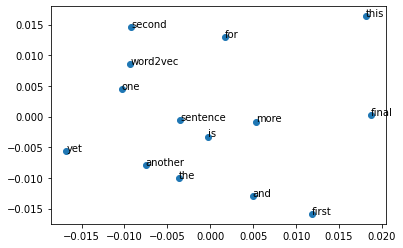

In [46]:
X = model[model.wv.vocab]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [48]:
result

array([[ 0.01814157,  0.01634976],
       [-0.00030698, -0.00327373],
       [-0.00362506, -0.00997845],
       [ 0.01184711, -0.01586572],
       [-0.00353278, -0.0005793 ],
       [ 0.00168133,  0.01292889],
       [-0.00931714,  0.00852165],
       [-0.00924243,  0.01457822],
       [-0.0167725 , -0.0055995 ],
       [-0.00751752, -0.00797401],
       [-0.01030718,  0.00446152],
       [ 0.00534641, -0.00082915],
       [ 0.0049214 , -0.01301502],
       [ 0.01868379,  0.00027483]], dtype=float32)

##### download Glove embeddings from Stanford university

In [ ]:
!wget "http://nlp.stanford.edu/data/glove.6B.zip"

--2021-01-14 10:13:57--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-01-14 10:13:57--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-14 10:13:57--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

##### Unzip

In [ ]:
!unzip "/content/glove.6B.zip"

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


#### Load Glove Embeddings vectords and save it as a model

In [ ]:
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

##### the Load the newly populated model

In [49]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

###### apply some arithematics

In [50]:
# calculate: (king - man) + woman = ?

result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]
